I want to see how the pointing drift compares between algorithms and without active feedback

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import boxcar
from Packages.UpdateManager import UpdateManager

First, we should analyze some unlocked data:

In [28]:
manager_unlock = UpdateManager()


dx = np.loadtxt('Data/2020-08-28Measure_dx', dtype=float)
t1 = np.loadtxt('Data/2020-08-28Measure_t1', dtype=float)
t2 = np.loadtxt('Data/2020-08-28Measure_t2', dtype=float)

"""
dx = np.loadtxt('Data/2020-09-03_Measure_dx', dtype=float)
t1 = np.loadtxt('Data/2020-09-03_Measure_t1', dtype=float)
t2 = np.loadtxt('Data/2020-09-03_Measure_t2', dtype=float)
"""

#Convert to more meaningful units:
dx[:,0] = dx[:,0]*5.2  #Convert to um
dx[:,1] = dx[:,1]*5.2  #Convert to um
# Convert the drift of the focal spot to angular drift [radians] via 
# eqn. 2 of  Appl. Sci. 2020, 10(11), 4047; https://doi.org/10.3390/app10114047 
f = 200*1000 # um
dx[:,2] = np.arctan((dx[:,2]*5.2)/(f)) #Convert to radians
dx[:,3] = np.arctan((dx[:,3]*5.2)/(f))  #Convert to radians

manager_unlock.load_data(dx, t1, t2)

In [29]:
print("The standard deviation of the dx data (in units explained above) is:", manager_unlock.standard_deviation)

The standard deviation of the dx data (in units explained above) is: [1.06033865e+01 9.45512887e+00 8.97514714e-06 4.77594020e-06]


Let us look in the frequency domain as well:

In [30]:
FrequencyData = manager_unlock.frequency_data

In [31]:
Frequency_Domain = manager_unlock.frequency_domain

In [32]:
for i in range(2):
    FrequencyData[i] = FrequencyData[i]/(manager_unlock.t1[-1]-manager_unlock.t1[0])  # Convert to Units of [dx]
for i in range(2):
    FrequencyData[i+2] = FrequencyData[i+2]/(manager_unlock.t2[-1]-manager_unlock.t2[0])  # Convert to Units of [dx]

Now, let's plot this data

cam1_dx

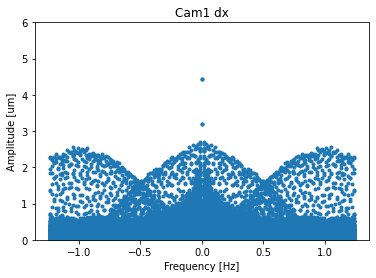

In [33]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0],np.abs(FrequencyData[0]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.title("Cam1 dx")
plt.ylim(0,6)
plt.savefig("cam_1_dx", box='tight')

cam1 dy

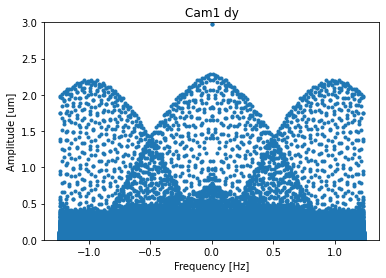

In [34]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0],np.abs(FrequencyData[1]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.ylim(0,3)
plt.title("Cam1 dy")
plt.savefig("cam_1_dy", box='tight')

cam2 dx

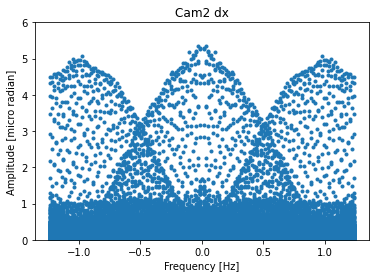

In [35]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1],np.abs(FrequencyData[2])*10**6, ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dx")
plt.ylim(0,6)
plt.savefig("cam_2_dx", box='tight')

cam2 dy

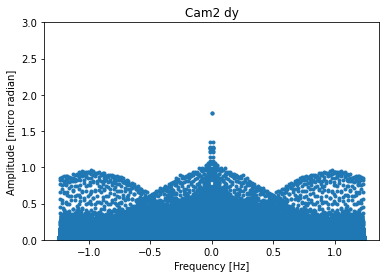

In [36]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1],np.abs(FrequencyData[3])*10**6, ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dy")
plt.ylim(0,3)
plt.savefig("cam_2_dy", box='tight')

Now, let us compare this to some locked data:

In [37]:
manager_lock = UpdateManager()

dx = np.loadtxt('Data/2020-09-03_Locked_Vis_dx', dtype=float)
t1 = np.loadtxt('Data/2020-09-03_Locked_Vis_t1', dtype=float)
t2 = np.loadtxt('Data/2020-09-03_Locked_Vis_t2', dtype=float)

#Convert to more meaningful units:
dx[:,0] = dx[:,0]*5.2  #Convert to um
dx[:,1] = dx[:,1]*5.2  #Convert to um
# Convert the drift of the focal spot to angular drift [radians] via 
# eqn. 2 of  Appl. Sci. 2020, 10(11), 4047; https://doi.org/10.3390/app10114047 
f = 200*1000 # um
dx[:,2] = np.arctan((dx[:,2]*5.2)/(f)) #Convert to radians
dx[:,3] = np.arctan((dx[:,3]*5.2)/(f))  #Convert to radians

manager_lock.load_data(dx, t1, t2)

In [38]:
print("The standard deviation of the dx data (in units explained above) is:", manager_lock.standard_deviation)

The standard deviation of the dx data (in units explained above) is: [5.97522752e+00 8.89194486e+00 9.26919676e-06 7.16131202e-06]


Let us look in the frequency domain as well:

In [39]:
FrequencyData = manager_lock.frequency_data

In [40]:
Frequency_Domain = manager_lock.frequency_domain

In [41]:
for i in range(2):
    FrequencyData[i] = FrequencyData[i]/(manager_lock.t1[-1]-manager_lock.t1[0])  # Convert to Units of [dx]
for i in range(2):
    FrequencyData[i+2] = FrequencyData[i+2]/(manager_lock.t2[-1]-manager_lock.t2[0])  # Convert to Units of [dx]

Now, let's plot this data

cam1_dx

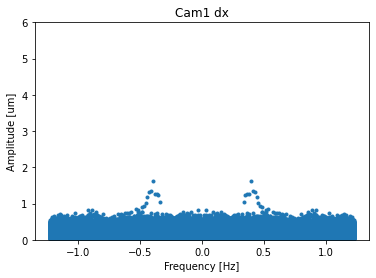

In [42]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0],np.abs(FrequencyData[0]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.title("Cam1 dx")
plt.ylim(0,6)
plt.savefig("cam_1_dx Locked", box='tight')

cam1 dy

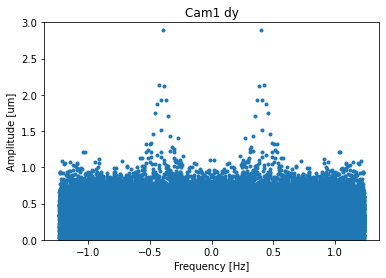

In [43]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0],np.abs(FrequencyData[1]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.title("Cam1 dy")
plt.ylim(0,3)
plt.savefig("cam_1_dy Locked", box='tight')

cam2 dx

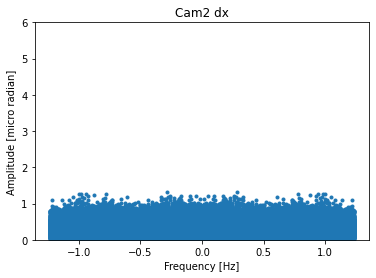

In [44]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1],np.abs(FrequencyData[2])*10**6, ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dx")
plt.ylim(0,6)
plt.savefig("cam_2_dx Locked", box='tight')

cam2 dy

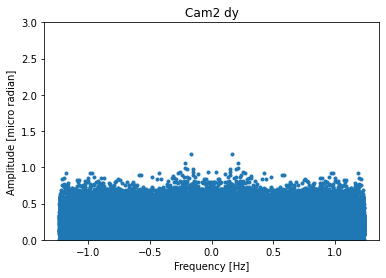

In [45]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1],np.abs(FrequencyData[3])*10**6, ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dy")
plt.ylim(0,3)
plt.savefig("cam_2_dy Locked", box='tight')